In [9]:
import pandas as pd
import seaborn as sns

In [2]:
path = "football-events"
events = "events.csv"
info = "ginf.csv"

In [3]:
pd_events = pd.read_csv("{}/{}".format(path, events))
pd_info = pd.read_csv("{}/{}".format(path, info))

__Eventos__

- Hay unos 9000 partidos, con una media de 100 eventos cada uno aprox
- 142 equipos

In [4]:
pd_events.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In [11]:
pd_events['len_text'] = pd_events['text'].map(lambda t: len(t.split(' ')))

In [12]:
pd_events[['text', 'len_text']]

,text,len_text
0,Attempt missed. Mladen Petric (Hamburg) left f...,26
1,"Corner, Borussia Dortmund. Conceded by Dennis...",8
2,"Corner, Borussia Dortmund. Conceded by Heiko ...",8
3,Foul by Sven Bender (Borussia Dortmund).,6
4,Gokhan Tore (Hamburg) wins a free kick in the ...,11
...,...,...
941004,Lucas Torreira (Sampdoria) wins a free kick in...,11
941005,"Corner, Sampdoria. Conceded by Andrea Masiello.",7
941006,Attempt missed. Fabio Quagliarella (Sampdoria)...,26
941007,Alberto Grassi (Atalanta) wins a free kick on ...,11


In [14]:
pd_events['len_text'].sum()

11755909

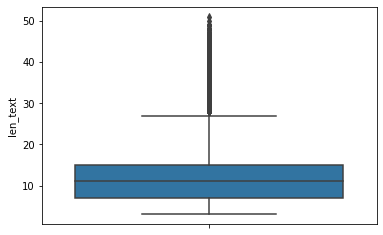

In [13]:
sns.boxplot(y='len_text', data=pd_events)

In [26]:
pd_events.columns

Index(['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal',
       'location', 'bodypart', 'assist_method', 'situation', 'fast_break'],
      dtype='object')

In [19]:
len(pd_events)

941009

In [24]:
pd_events.groupby('id_odsp').count()['id_event'].mean()

103.70387921534054

In [11]:
pd_events.groupby('event_team').count()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,opponent,player,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
event_team,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,5715,5715,5715,5715,5715,5715,1148,5715,5715,5391,...,307,307,1097,1102,5715,2640,1106,5715,1106,5715
AC Milan,11633,11633,11633,11633,11633,11633,2793,11633,11633,10921,...,593,593,3037,3056,11633,5905,3065,11633,3065,11633
AJ Auxerre,1984,1984,1984,1984,1984,1984,401,1984,1984,1871,...,104,104,444,446,1984,915,446,1984,446,1984
AS Monaco,6850,6850,6850,6850,6850,6850,1522,6850,6850,6369,...,385,385,1648,1660,6850,3401,1665,6850,1665,6850
AS Nancy Lorraine,4580,4580,4580,4580,4580,4580,1054,4580,4580,4287,...,232,232,1053,1057,4580,2232,1058,4580,1058,4580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villarreal,8248,8248,8248,8248,8248,8248,1842,8248,8248,7683,...,480,480,1834,1845,8248,3934,1849,8248,1849,8248
Watford,2694,2694,2694,2694,2694,2694,556,2694,2694,2460,...,164,164,675,677,2694,1317,678,2694,678,2694
Werder Bremen,9975,9975,9975,9975,9975,9975,2089,9975,9975,9407,...,490,490,2300,2313,9975,5032,2318,9975,2318,9975


__Info__

In [18]:
pd_info.columns

Index(['id_odsp', 'link_odsp', 'adv_stats', 'date', 'league', 'season',
       'country', 'ht', 'at', 'fthg', 'ftag', 'odd_h', 'odd_d', 'odd_a',
       'odd_over', 'odd_under', 'odd_bts', 'odd_bts_n'],
      dtype='object')

In [13]:
pd_info

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10107,xAkY8l6R/,/soccer/italy/serie-a/genoa-crotone-xAkY8l6R/,True,2017-01-22,I1,2017,italy,Genoa,Crotone,2,2,1.97,4.35,8.00,1.95,2.03,2.03,1.86
10108,xSU9scI9/,/soccer/england/premier-league/chelsea-hull-ci...,True,2017-01-22,E0,2017,england,Chelsea,Hull,2,0,1.19,8.50,20.00,1.54,2.68,2.40,1.66
10109,xY7uZwOI/,/soccer/france/ligue-1/monaco-lorient-xY7uZwOI/,True,2017-01-22,F1,2017,france,AS Monaco,Lorient,4,0,1.32,6.24,11.50,1.53,3.08,1.80,2.25
10110,YyeGxMX8/,/soccer/spain/laliga/betis-gijon-YyeGxMX8/,True,2017-01-22,SP1,2017,spain,Real Betis,Sporting Gijon,0,0,1.74,4.07,5.90,2.20,1.89,2.05,1.86


In [27]:
pd_info['link_odsp']

0        /soccer/germany/bundesliga-2011-2012/dortmund-...
1        /soccer/germany/bundesliga-2011-2012/augsburg-...
2        /soccer/germany/bundesliga-2011-2012/werder-br...
3        /soccer/france/ligue-1-2011-2012/paris-sg-lori...
4        /soccer/france/ligue-1-2011-2012/caen-valencie...
                               ...                        
10107        /soccer/italy/serie-a/genoa-crotone-xAkY8l6R/
10108    /soccer/england/premier-league/chelsea-hull-ci...
10109      /soccer/france/ligue-1/monaco-lorient-xY7uZwOI/
10110           /soccer/spain/laliga/betis-gijon-YyeGxMX8/
10111    /soccer/italy/serie-a/atalanta-sampdoria-z5L2O...
Name: link_odsp, Length: 10112, dtype: object

In [17]:
pd_info.groupby(['league', 'country', 'season']).count()

id_odsp  link_odsp  adv_stats  date   ht   at  fthg  \
league country season                                                        
D1     germany 2012        306        306        306   306  306  306   306   
               2013        308        308        308   308  308  308   308   
               2014        308        308        308   308  308  308   308   
               2015        307        307        307   307  307  307   307   
               2016        308        308        308   308  308  308   308   
               2017        153        153        153   153  153  153   153   
E0     england 2012        380        380        380   380  380  380   380   
               2013        380        380        380   380  380  380   380   
               2014        380        380        380   380  380  380   380   
               2015        380        380        380   380  380  380   380   
               2016        380        380        380   380  380  380   380   
               2017        220        220        220   220  220  220   220   
F1     france  2012        380        380        380   380  380  380   380   
               2013        380        380        380   380  380  380   380   
               2014        379        379        379   379  379  379   379   
               2015        380        380        380   380  380  380   380   
               2016        380        380        380   380  380  380   380   
               2017        208        208        208   208  208  208   208   
I1     italy   2012        380        380        380   380  380  380   380   
               2013        379        379        379   379  379  379   379   
               2014        380        380        380   380  380  380   380   
               2015        380        380        380   380  380  380   380   
               2016        380        380        380   380  380  380   380   
               2017        207        207        207   207  207  207   207   
SP1    spain   2012        380        380        380   380  380  380   380   
               2013        380        380        380   380  380  380   380   
               2014        380        380        380   380  380  380   380   
               2015        380        380        380   380  380  380   380   
               2016        380        380        380   380  380  380   380   
               2017        189        189        189   189  189  189   189   

                       ftag  odd_h  odd_d  odd_a  odd_over  odd_under  \
league country season                                                   
D1     germany 2012     306    306    306    306         0          0   
               2013     308    308    308    308         0          0   
               2014     308    308    308    308         0          0   
               2015     307    307    307    307         0          0   
               2016     308    308    308    308         0          0   
               2017     153    153    153    153       153        153   
E0     england 2012     380    380    380    380         0          0   
               2013     380    380    380    380         0          0   
               2014     380    380    380    380         0          0   
               2015     380    380    380    380         0          0   
               2016     380    380    380    380         0          0   
               2017     220    220    220    220       220        220   
F1     france  2012     380    380    380    380         0          0   
               2013     380    380    380    380         0          0   
               2014     379    379    379    379         0          0   
               2015     380    380    380    380         0          0   
               2016     380    380    380    380         0          0   
               2017     208    208    208    208       208        208   
I1     italy   2012     380    380    380    380         0        